# Background
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees that causes the remaining hive colonies to collapse. Speculation on the cause of this disorder points to hive diseases and pesticides harming the pollinators, tho no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Nowadays, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America from 1998 to 2016.

# Objective:
To visualize how honey production has changed over the years (1998–2016) in the United States.

Key questions to be answered:

* How has honey production yield changed from 1998 to 2016?
* Over time, what have been the major production trends across the states?
* Are there any pattern that can be observed between total honey production and the value of production every year? How has the value of production, which in some sense could be tied to demand, changed every year?

# Dataset:

* **State**: Various states in the U.S.
* **year**: Year of production
* **stocks**: Refers to stocks held by producers. Unit is pounds
* **numcol**: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year
* **yieldpercol**: honey yield per colony. The unit is in pounds
* **totalprod**: Total production (numcol x yieldpercol). Unit is pounds
* **priceperlb**: Refers to average price per pound based on expanded sales. The unit is dollars.
* **prodvalue**: Value of production (totalprod x priceperlb). The unit is dollars.


## **Importing the libraries**

In [93]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # to suppress future warnings

## **Reading the datasets**

In [94]:
# loading the dataset
df = pd.read_csv("honeyproduction1998-2016-1.csv")

## **Data Overview**

In [95]:
# checking the top 5 rows of the dataset
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [96]:
# checking the last 5 rows of the dataset
df.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
780,Virginia,5000.0,38,190000.0,30000.0,5.85,1112000.0,2016
781,Washington,84000.0,35,2940000.0,412000.0,1.99,5851000.0,2016
782,West Virginia,5000.0,32,160000.0,43000.0,3.92,627000.0,2016
783,Wisconsin,54000.0,62,3348000.0,1205000.0,2.67,8939000.0,2016
784,Wyoming,40000.0,68,2720000.0,190000.0,1.78,4842000.0,2016


In [97]:
# checking the random 5 rows of the dataset
df.sample(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
532,North Dakota,510000.0,91,46410000.0,12995000.0,1.50,69615000.0,2010
321,Missouri,15000.0,50,750000.0,180000.0,1.22,915000.0,2005
414,Pennsylvania,25000.0,42,1050000.0,326000.0,1.70,1785000.0,2007
395,Iowa,26000.0,81,2106000.0,1221000.0,1.31,2759000.0,2007
759,Louisiana,50000.0,86,4300000.0,301000.0,1.94,8342000.0,2016


In [98]:
# checking the shape of the dataset
df.shape

(785, 8)

- The Dataset has 785 number of rows with 8 columns

In [99]:
# checking the basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        785 non-null    object 
 1   numcol       785 non-null    float64
 2   yieldpercol  785 non-null    int64  
 3   totalprod    785 non-null    float64
 4   stocks       785 non-null    float64
 5   priceperlb   785 non-null    float64
 6   prodvalue    785 non-null    float64
 7   year         785 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 49.2+ KB


- There is only one object datatype column with 7 numerical datatypes
- All the columns have 785 observations, which means none of the columns has null values



In [100]:
# checking the number of missing values in each column
df.isna().sum()

,0
state,0
numcol,0
yieldpercol,0
totalprod,0
stocks,0
priceperlb,0
prodvalue,0
year,0


In [101]:
# checking the number of duplicated rows
df.duplicated().sum()

np.int64(0)

In [102]:
# checking the basic statistical summary of the data
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,785.000000,785.000000,7.850000e+02,7.850000e+02,785.000000,7.850000e+02,785.000000
mean,61686.624204,60.578344,4.140957e+06,1.257629e+06,1.695159,5.489739e+06,2006.817834
std,92748.940458,19.427831,6.884594e+06,2.211794e+06,0.930623,9.425394e+06,5.491523
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,46.000000,4.700000e+05,1.190000e+05,1.050000,9.010000e+05,2002.000000
50%,26000.000000,58.000000,1.500000e+06,3.910000e+05,1.480000,2.112000e+06,2007.000000
75%,65000.000000,72.000000,4.096000e+06,1.380000e+06,2.040000,5.559000e+06,2012.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,7.090000,8.385900e+07,2016.000000


- Number of colonies in every state are spread over a huge range. Ranging from 2000 to 510000
- The average number of colonies is close to the 75% percentile of the data, indicating a right skew
- As expected, the standard deviation of numcol columns is very high
- Yield per colony also has a huge spread ranging from 19 pounds to 136 pounds, but the average value is close to the median of the data, which means the data is evenly distributed across this column
- In fact, all the variables seem to have a huge range, we will have to investigate further if this spread is mainly across different states or varies in the same state over the years


#### Distribution of number of colonies

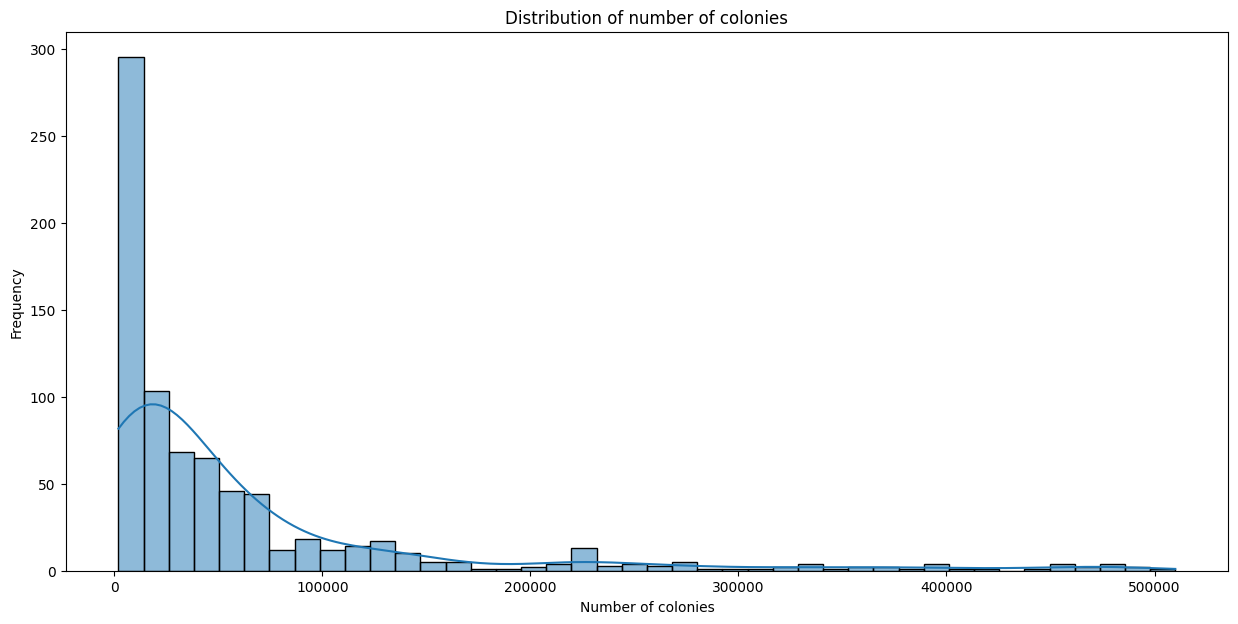

In [103]:
plt.figure(figsize=(15, 7))
sns.histplot(data= df, x= "numcol", kde= True)
plt.xlabel("Number of colonies")
plt.ylabel("Frequency")
plt.title("Distribution of number of colonies")
plt.show()

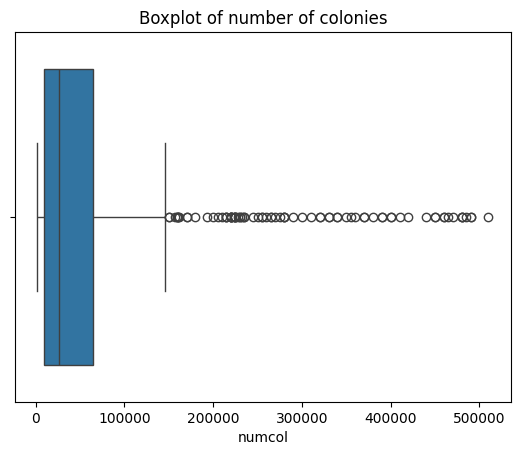

In [104]:
sns.boxplot(data = df, x = 'numcol')
plt.title("Boxplot of number of colonies")
plt.show()


In [105]:
df['numcol'].median()

26000.0


- Most of the data is concentrated within the range of 0-50000, which means most of the states have around 50000 which are producing honey
- The distribution is right-skewed with a lot of outliers towards the higher end
- The median honey-producing colonies is 26000

#### Distribution of yield per colony

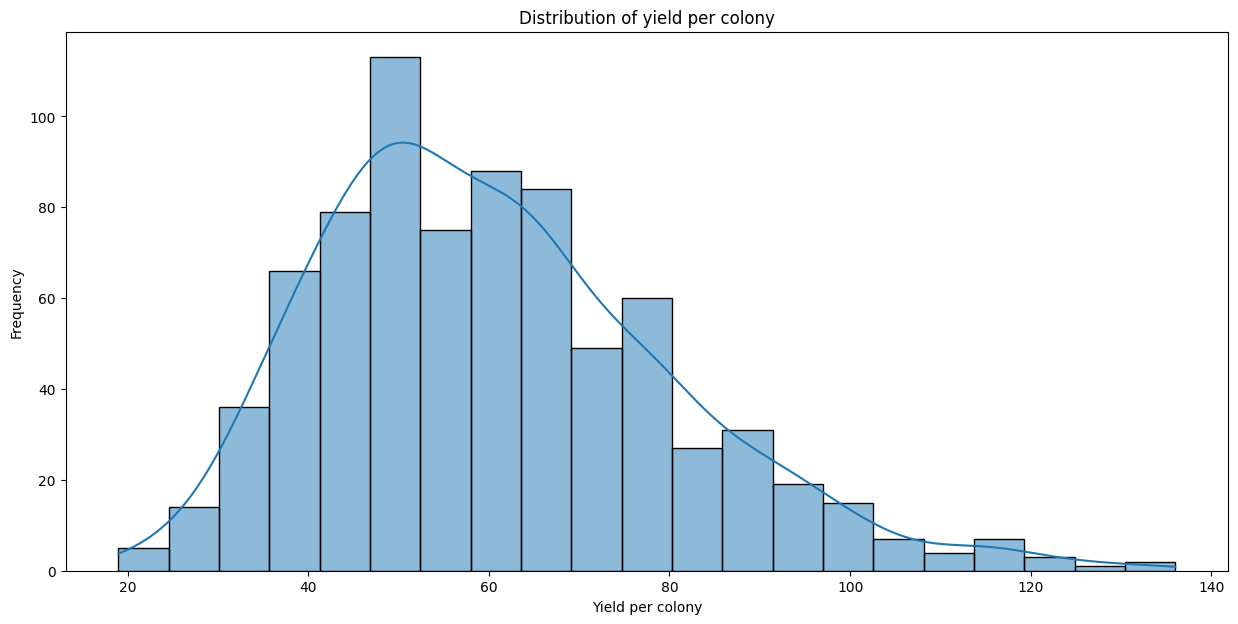

In [106]:
plt.figure(figsize=(15, 7))
sns.histplot(data= df, x= "yieldpercol", kde= True)
plt.xlabel("Yield per colony")
plt.ylabel("Frequency")
plt.title("Distribution of yield per colony")
plt.show()

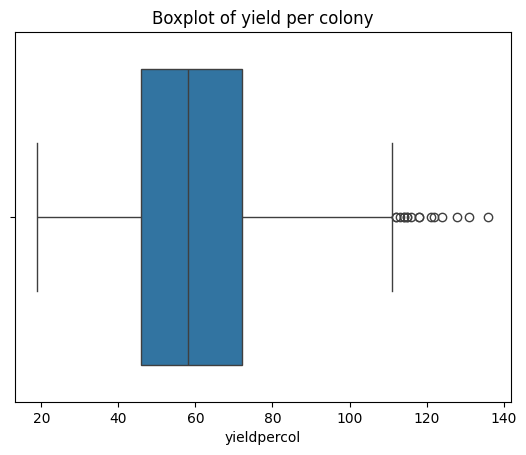

In [107]:
sns.boxplot(data = df, x = 'yieldpercol')
plt.title("Boxplot of yield per colony")
plt.show()


- Distribution looks like almost evenly distributed with little skewness
- Yield per colony of honey has a right skewed distribution with a lot of outliers towards the higher end
- The median yield per colony is close to 60 pounds

#### distribution of total production of honey

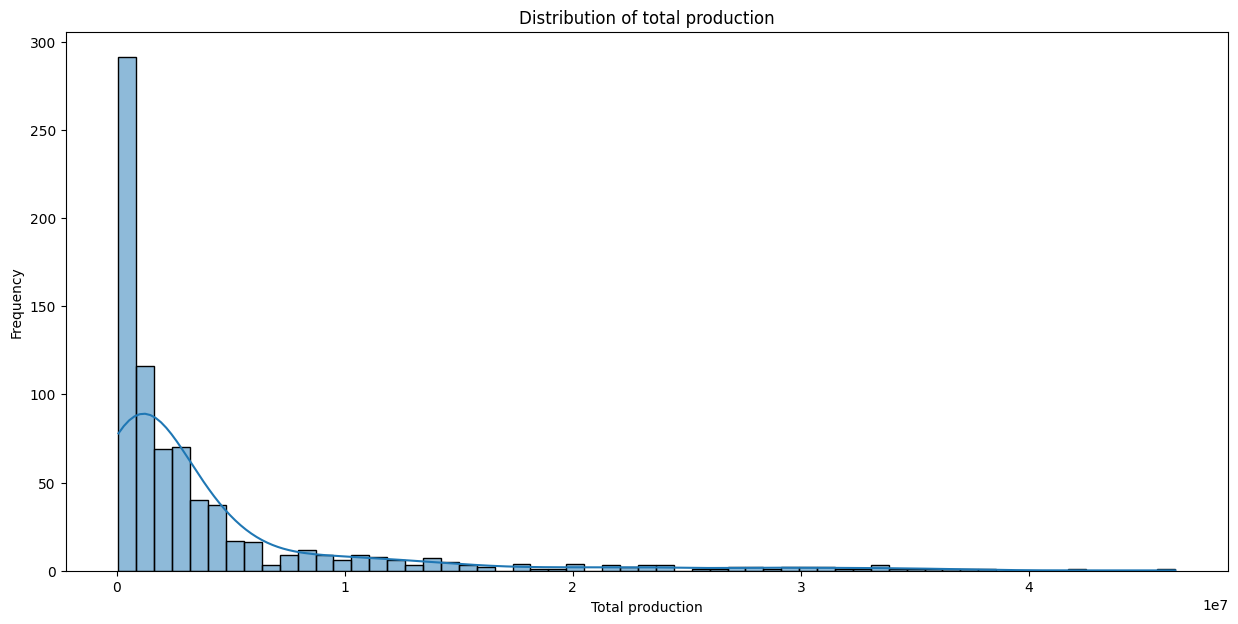

In [108]:
plt.figure(figsize=(15, 7))
sns.histplot(data= df, x= "totalprod", kde= True)
plt.xlabel("Total production")
plt.ylabel("Frequency")
plt.title("Distribution of total production")
plt.show()


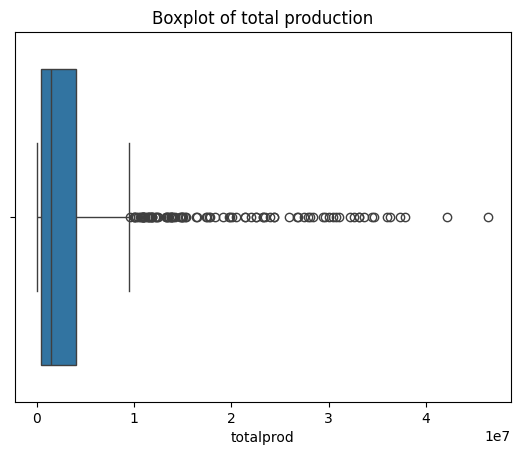

In [109]:
sns.boxplot(data = df, x = 'totalprod')
plt.title("Boxplot of total production")
plt.show()

- Total production has a right-skewed distribution with a lot of outliers towards the higher end
- The median of total production is nearly 0.1 pounds
- Since total production is related to the number of colonies, the distribution is almost similar to that variable

#### distribution of cost of honey per pound

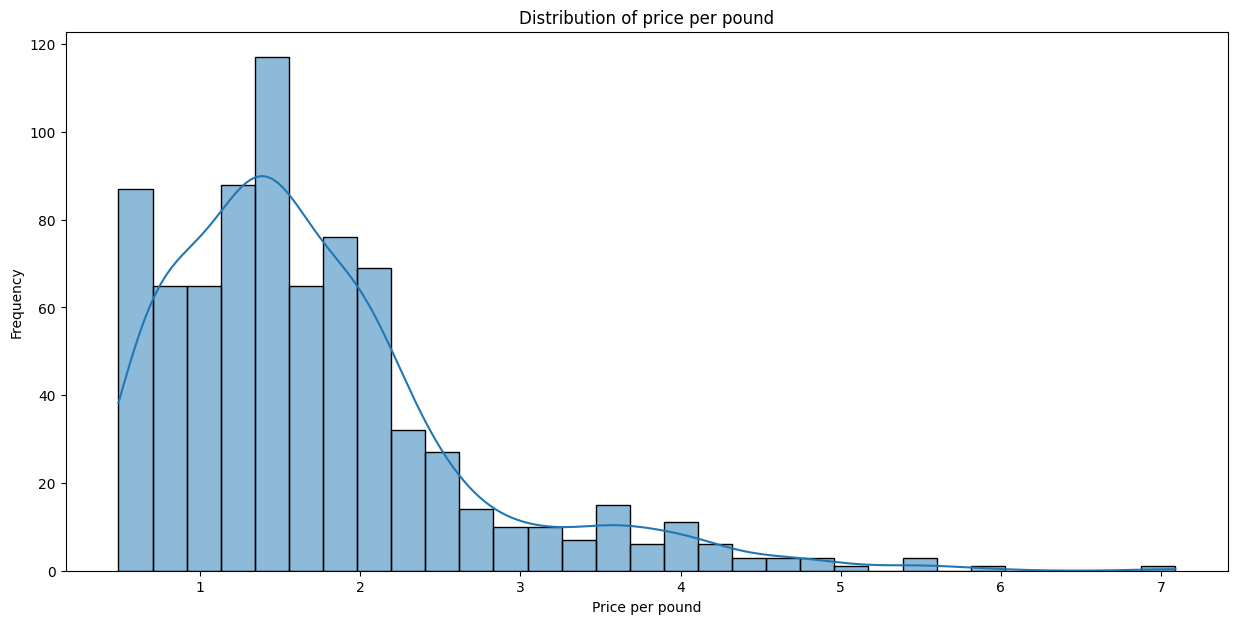

In [110]:
plt.figure(figsize=(15, 7))
sns.histplot(data= df, x= "priceperlb", kde= True)
plt.xlabel("Price per pound")
plt.ylabel("Frequency")
plt.title("Distribution of price per pound")
plt.show()

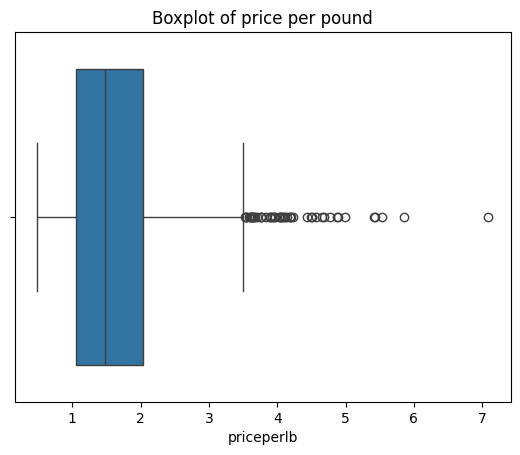

In [111]:
sns.boxplot(data = df, x = 'priceperlb')
plt.title("Boxplot of price per pound")
plt.show()

- Most of the honey is priced between 0-2 dollars
- Price per pound of honey has a right-skewed distribution with a lot of outliers towards the higher end
- The median price per pound of honey is 1.5 dollars

#### Distribution of value of production

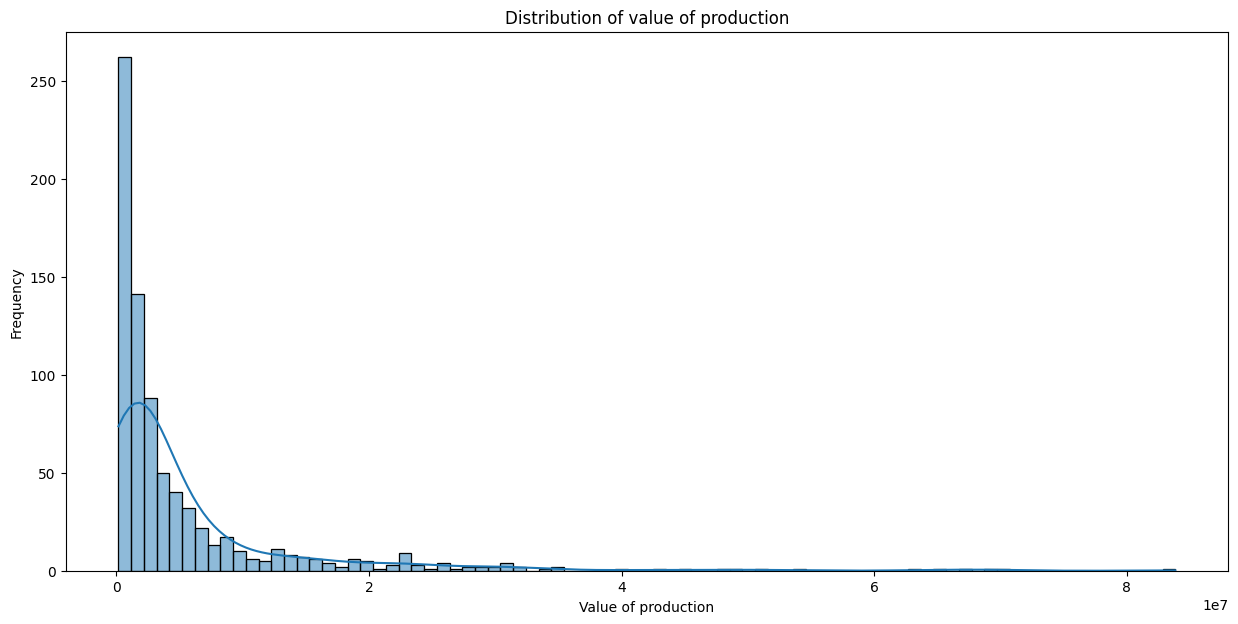

In [112]:
plt.figure(figsize=(15, 7))
sns.histplot(data= df, x= "prodvalue", kde= True)
plt.xlabel("Value of production")
plt.ylabel("Frequency")
plt.title("Distribution of value of production")
plt.show()

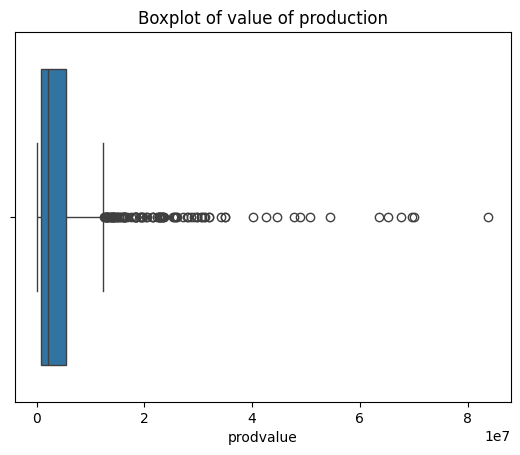

In [113]:
sns.boxplot(data = df, x = 'prodvalue')
plt.title("Boxplot of value of production")
plt.show()

In [114]:
df['prodvalue'].median()

2112000.0

- Production value has a right-skewed distribution with a lot of outliers towards the higher end
- The median production value is 0 and 1 dollars

#### Distribution of stocks held by producers

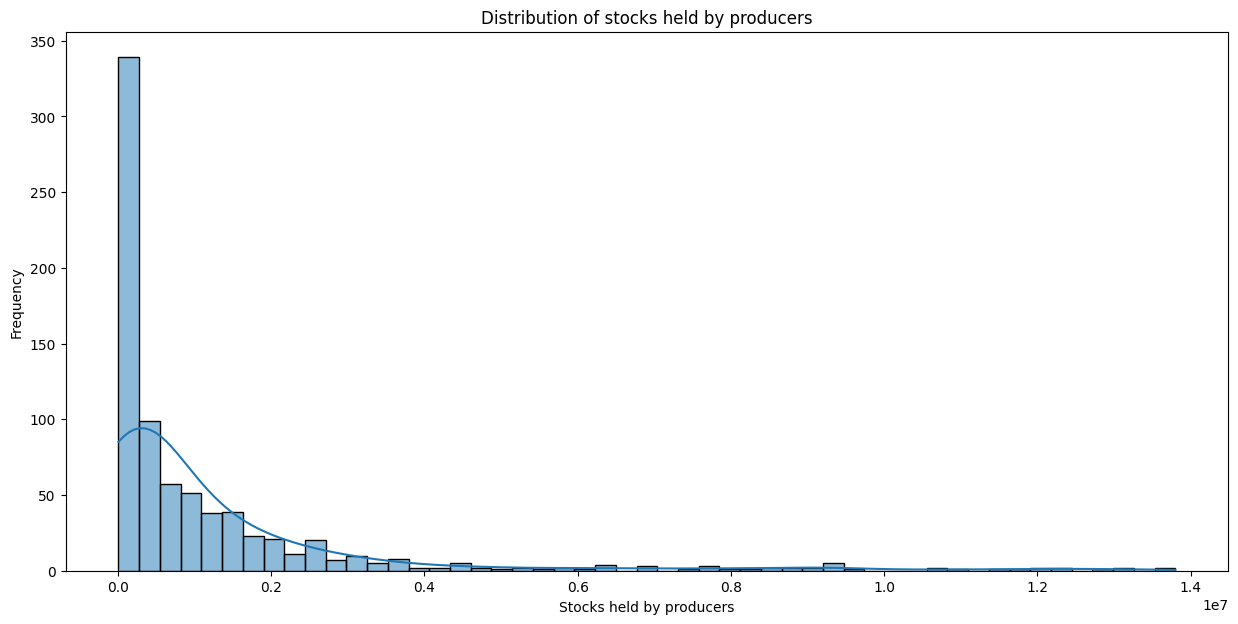

In [115]:
plt.figure(figsize=(15, 7))
sns.histplot(data= df, x= "stocks", kde= True)
plt.xlabel("Stocks held by producers")
plt.ylabel("Frequency")
plt.title("Distribution of stocks held by producers")
plt.show()


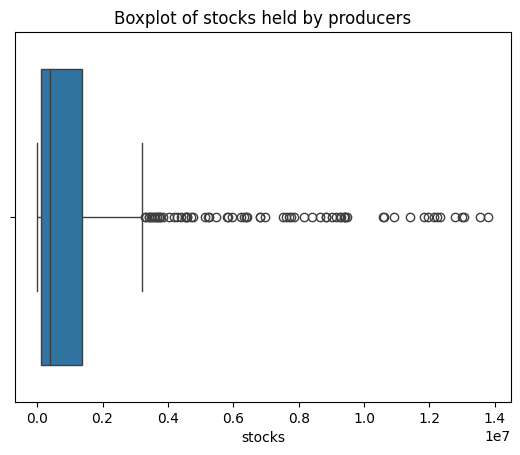

In [116]:
sns.boxplot(data = df, x = 'stocks')
plt.title("Boxplot of stocks held by producers")
plt.show()

- Stocks held by producers has a right-skewed distribution with a lot of outliers towards the higher end
- The median stocks held by producers is close to 0, which shows the majority of the producers hold very less stocks to themselves

#### Pairplot

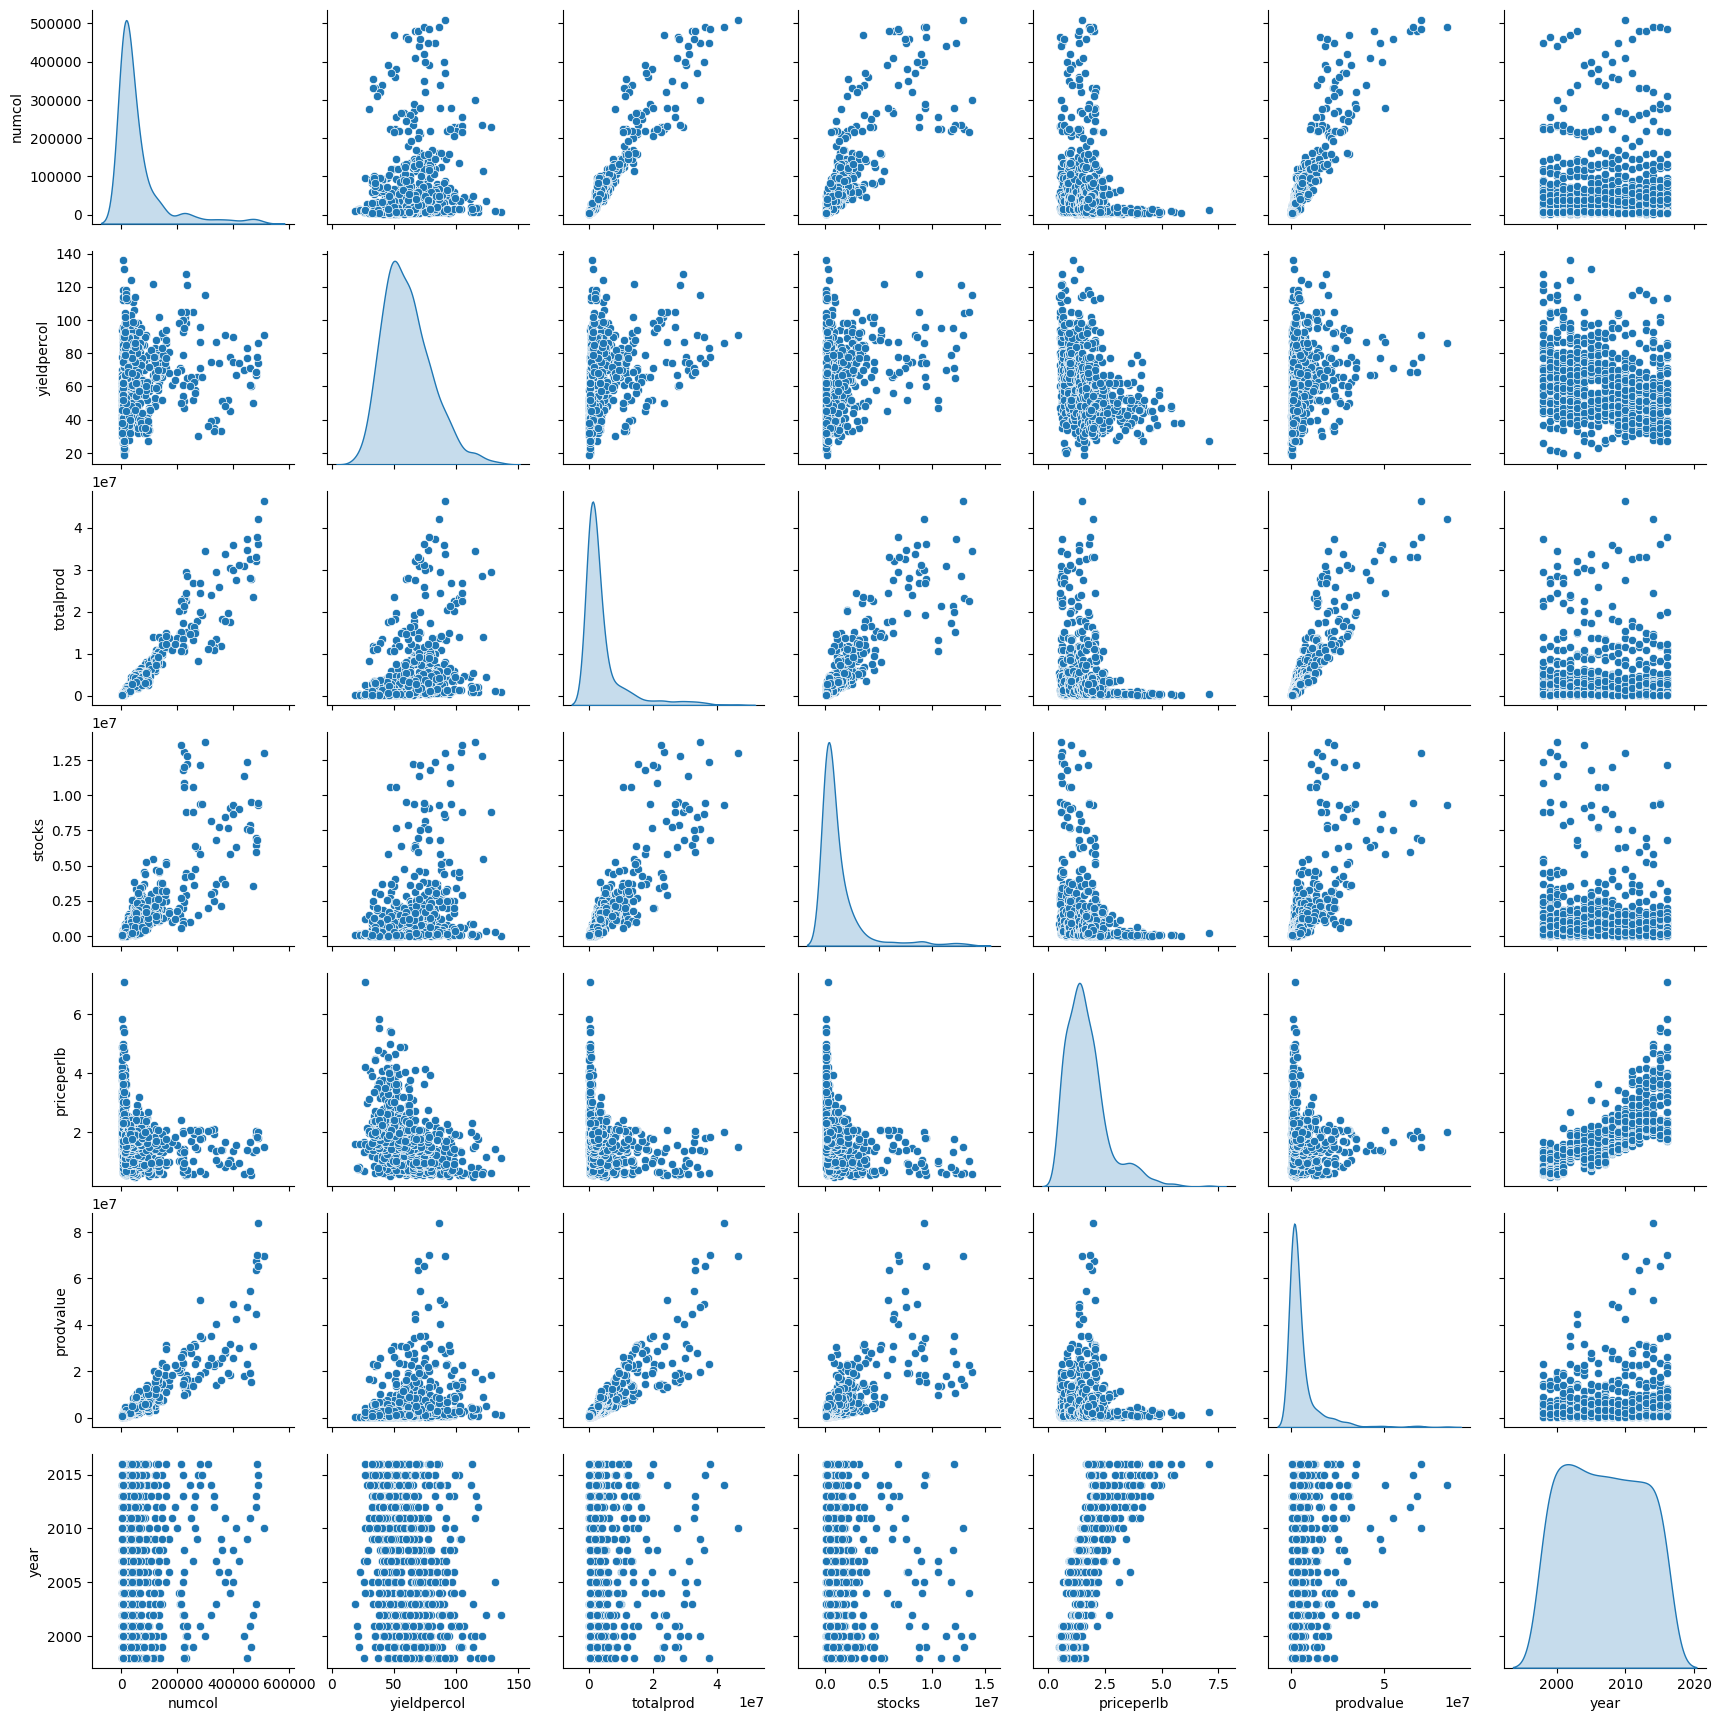

In [117]:
sns.pairplot(df, diag_kind="kde")
plt.show()

In [118]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        785 non-null    object 
 1   numcol       785 non-null    float64
 2   yieldpercol  785 non-null    int64  
 3   totalprod    785 non-null    float64
 4   stocks       785 non-null    float64
 5   priceperlb   785 non-null    float64
 6   prodvalue    785 non-null    float64
 7   year         785 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 49.2+ KB


#### Heatmap

In [120]:
correlation = df.select_dtypes(exclude='object').corr()
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.224539,0.951822,0.820076,-0.211427,0.898989,0.026711
yieldpercol,0.224539,1.000000,0.382945,0.358676,-0.360571,0.255789,-0.248737
totalprod,0.951822,0.382945,1.000000,0.876872,-0.239085,0.895242,-0.040497
stocks,0.820076,0.358676,0.876872,1.000000,-0.275926,0.713161,-0.115520
priceperlb,-0.211427,-0.360571,-0.239085,-0.275926,1.000000,-0.061833,0.733959
prodvalue,0.898989,0.255789,0.895242,0.713161,-0.061833,1.000000,0.188790
year,0.026711,-0.248737,-0.040497,-0.115520,0.733959,0.188790,1.000000


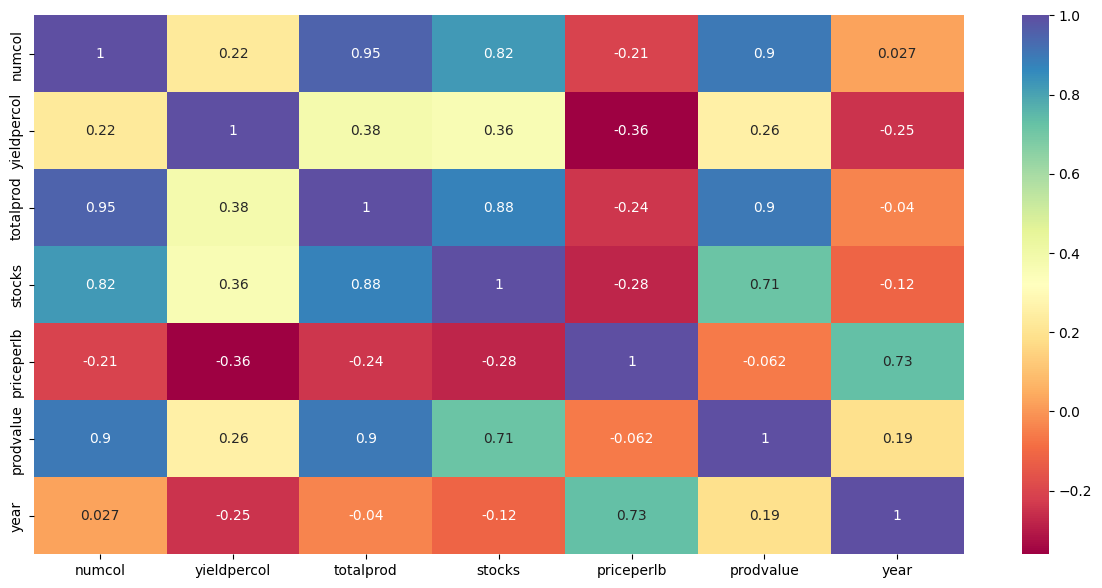

In [121]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, cmap="Spectral")
plt.show()

- Number of colonies have a high positive correlation with total production, stocks and the value of production. As expected, all these values are highly correlated with each other
- Yield per colony does not have a high correlation with any of the features that we have in our dataset
- Same is the case with priceperlb
- Determining the factors influencing per colony yield and price per pound of honey would need further investigation

#### state and year

In [122]:
df['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'South Carolina'], dtype=object)

In [123]:
df['state'].nunique()

44

So, in total, 44 states are producing honey

#### States with maximum and minimum honey production

In [124]:
top10_totalprod= df.groupby('state').sum()[['totalprod']].sort_values('totalprod', ascending=False).reset_index().head(10)
top10_totalprod

,state,totalprod
0,North Dakota,624435000.0
1,California,390315000.0
2,South Dakota,344361000.0
3,Florida,297798000.0
4,Montana,210125000.0
5,Minnesota,175432000.0
6,Texas,137832000.0
7,Wisconsin,95067000.0
8,Michigan,93788000.0
9,Idaho,78362000.0


<Figure size 2000x600 with 0 Axes>

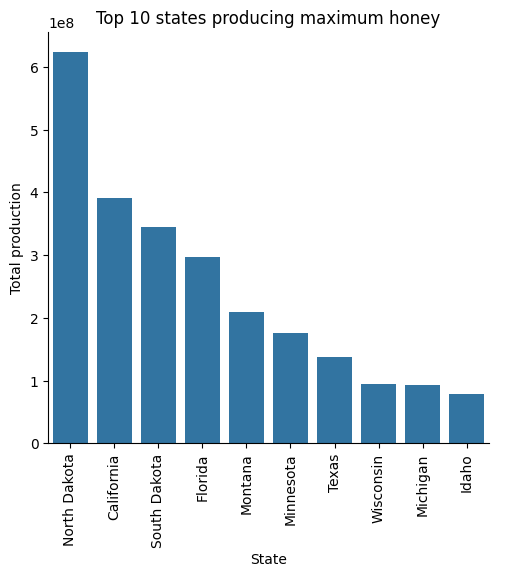

In [125]:
plt.figure(figsize=(20,6))
sns.catplot(data=top10_totalprod,x= 'state', y='totalprod', kind='bar')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total production')
plt.title('Top 10 states producing maximum honey')
plt.show()

In [126]:
bottom10_totalprod= df.groupby('state').sum()[['totalprod']].sort_values('totalprod', ascending=False).reset_index().tail(10)
bottom10_totalprod

,state,totalprod
34,New Mexico,7147000.0
35,Vermont,6720000.0
36,West Virginia,5615000.0
37,Maine,5256000.0
38,Virginia,4837000.0
39,Nevada,4832000.0
40,Kentucky,4263000.0
41,South Carolina,3174000.0
42,Maryland,1266000.0
43,Oklahoma,1207000.0


<Figure size 2000x600 with 0 Axes>

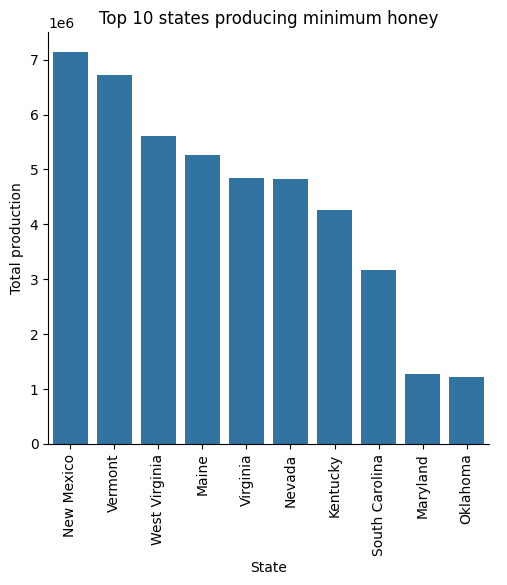

In [127]:
plt.figure(figsize=(20,6))
sns.catplot(data=bottom10_totalprod,x= 'state', y='totalprod', kind='bar');
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total production')
plt.title('Top 10 states producing minimum honey')
plt.show()

- North Dakota is producing the maximum amount of honey followed by California and South Dakota as compared to other states
- Oklahoma is producing the least amount of honey in total followed by Maryland and South California

#### State with costliest and cheapest honey on an average basis

In [128]:
top10_price= df.groupby('state').sum()[['priceperlb']].sort_values('priceperlb', ascending=False).reset_index().head(10)
top10_price

,state,priceperlb
0,Virginia,55.36
1,Illinois,50.47
2,North Carolina,47.56
3,Kentucky,46.51
4,Tennessee,44.64
5,West Virginia,43.61
6,New Jersey,41.25
7,Vermont,40.43
8,Maine,38.42
9,Ohio,38.26


<Figure size 2000x600 with 0 Axes>

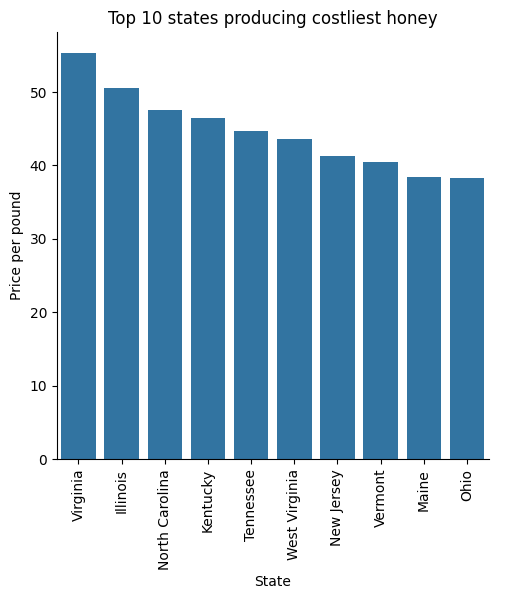

In [129]:
plt.figure(figsize=(20,6))
sns.catplot(data=top10_price,x= 'state', y='priceperlb', kind='bar')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Price per pound')
plt.title('Top 10 states producing costliest honey')
plt.show()

In [130]:
bottom10_price= df.groupby('state').sum()[['priceperlb']].sort_values('priceperlb', ascending=False).reset_index().tail(10)
bottom10_price

,state,priceperlb
34,South Dakota,24.80
35,North Dakota,24.56
36,Nevada,24.41
37,Arkansas,24.35
38,Mississippi,23.88
39,Louisiana,23.77
40,New Mexico,19.77
41,South Carolina,16.57
42,Maryland,9.37
43,Oklahoma,8.74


<Figure size 2000x600 with 0 Axes>

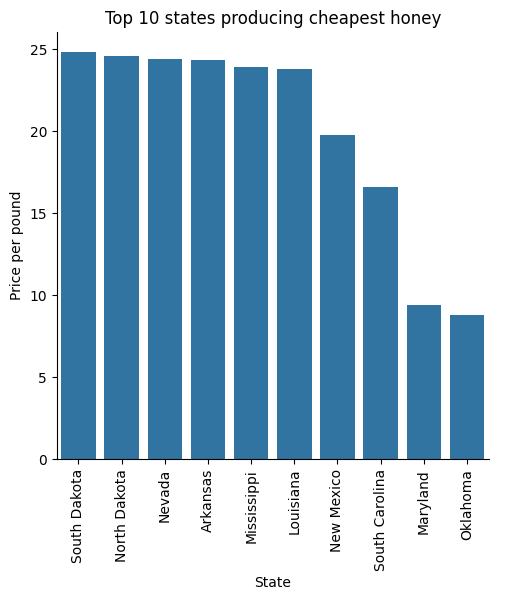

In [131]:
plt.figure(figsize=(20,6))
sns.catplot(data=bottom10_price,x= 'state', y='priceperlb', kind='bar')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Price per pound')
plt.title('Top 10 states producing cheapest honey')
plt.show()

- Virginia is producing the costliest honey followed by Illinois and North Carolina as compared to other states
- Averagely Oklahoma is producing the cheapest honey followed by Maryland and South Carolina

#### Trend of honey production in the US over the years

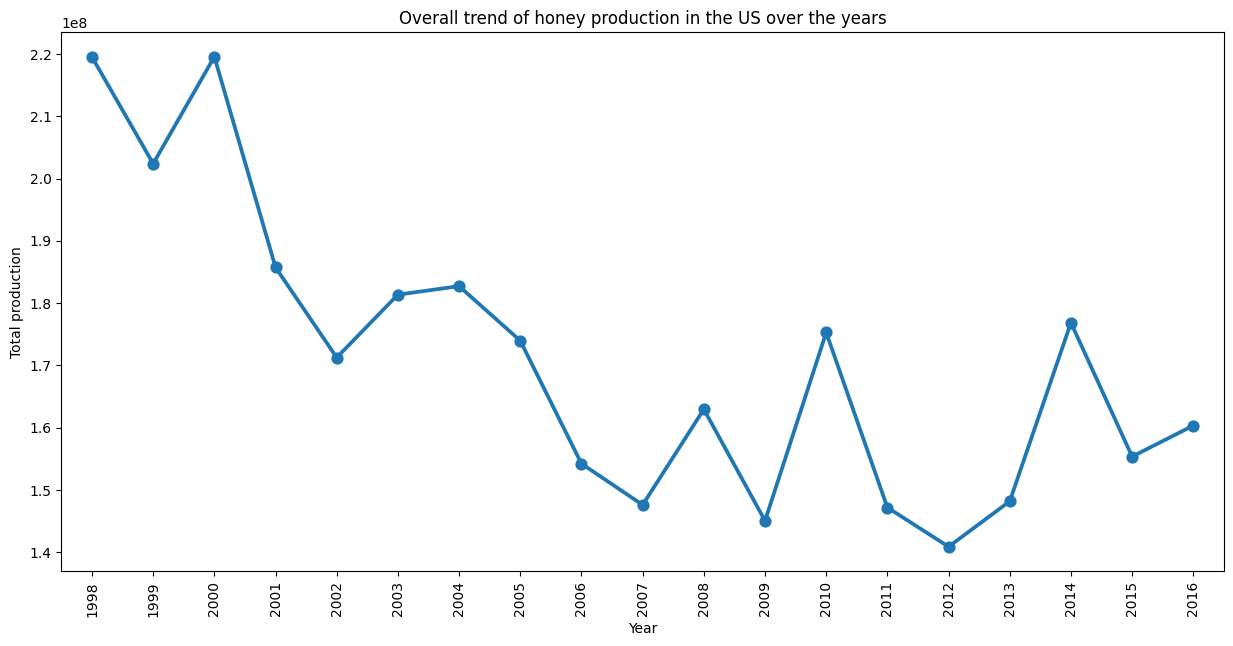

In [132]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Total production')
plt.title('Overall trend of honey production in the US over the years')
plt.show()

- The overall honey production in the US has been decreasing over the years
- Total honey production = number of colonies average yield per colony.
- Let's check if the honey production is decreasing due to one of these factors or both

#### Variation in the number of colonies over the years

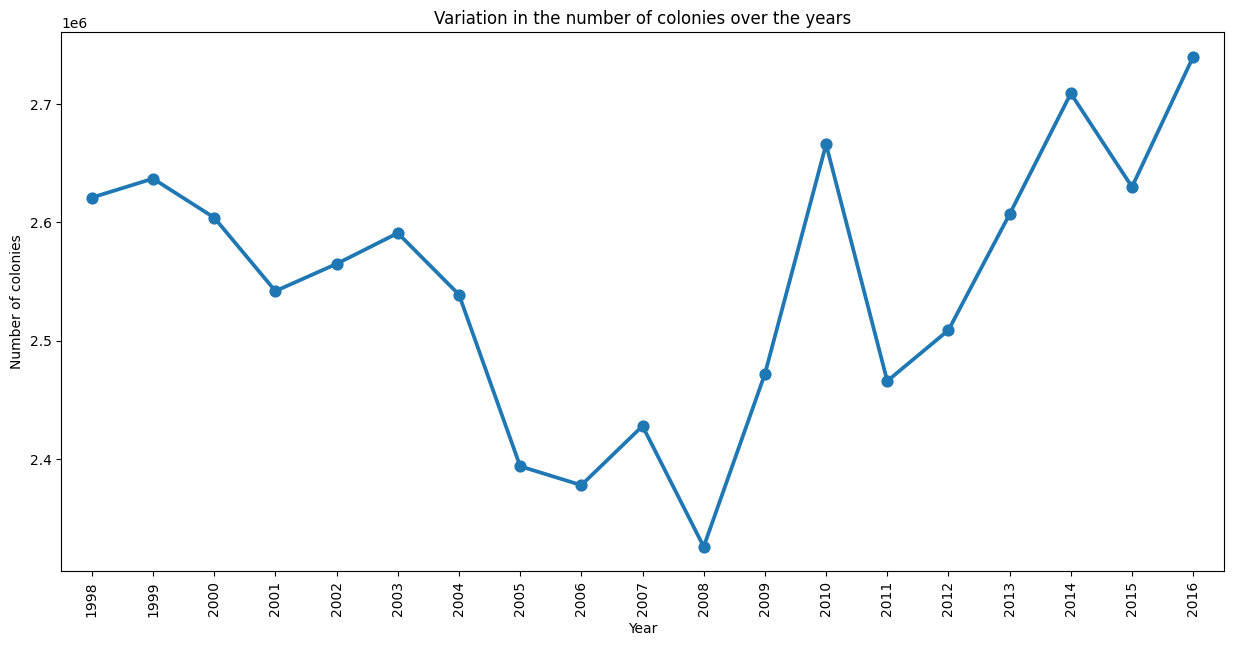

In [133]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='numcol', data=df, ci=None, estimator=sum)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of colonies')
plt.title('Variation in the number of colonies over the years')
plt.show()

- The number of colonies across the country shows a declining trend from 1998-2008 but has seen an uptick after 2008
- It is possible that there was some intervention in 2008 that help in increasing the number of honey bee colonies across the country

#### Variation of yield per colony over the years

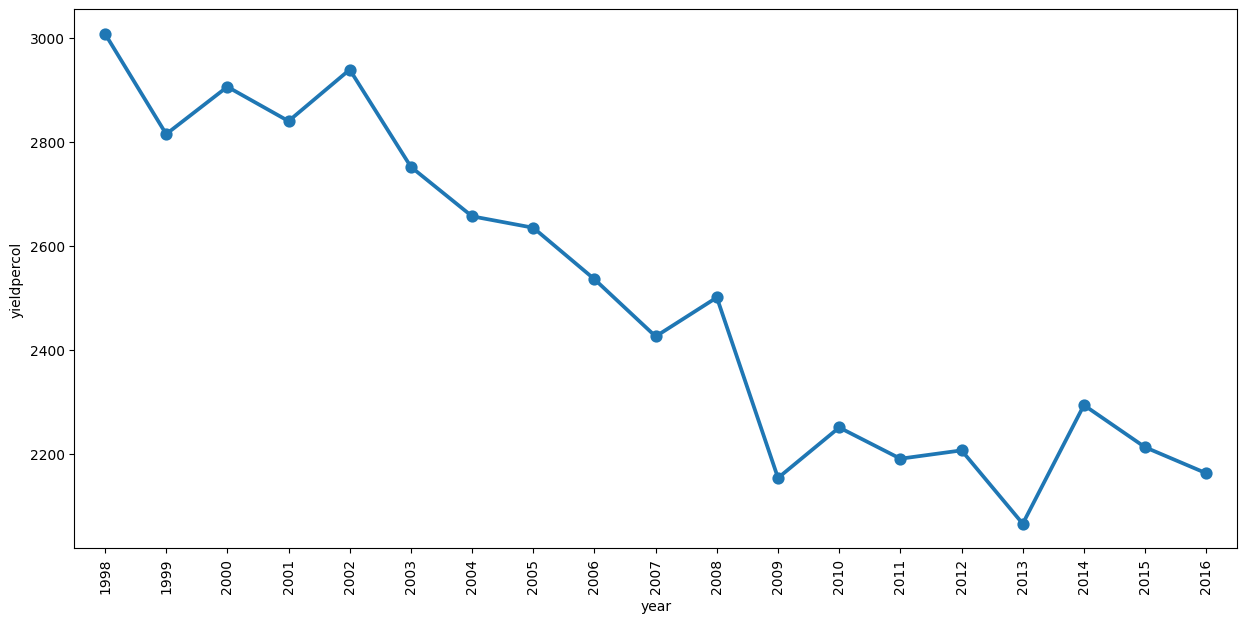

In [134]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='yieldpercol', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90);

- In contrast to the number of colonies, the yield per colony has been decreasing since 1998
- This indicates that it is not the number of colonies that is causing a decline in total honey production but the yield per colony

#### Production trend at state level

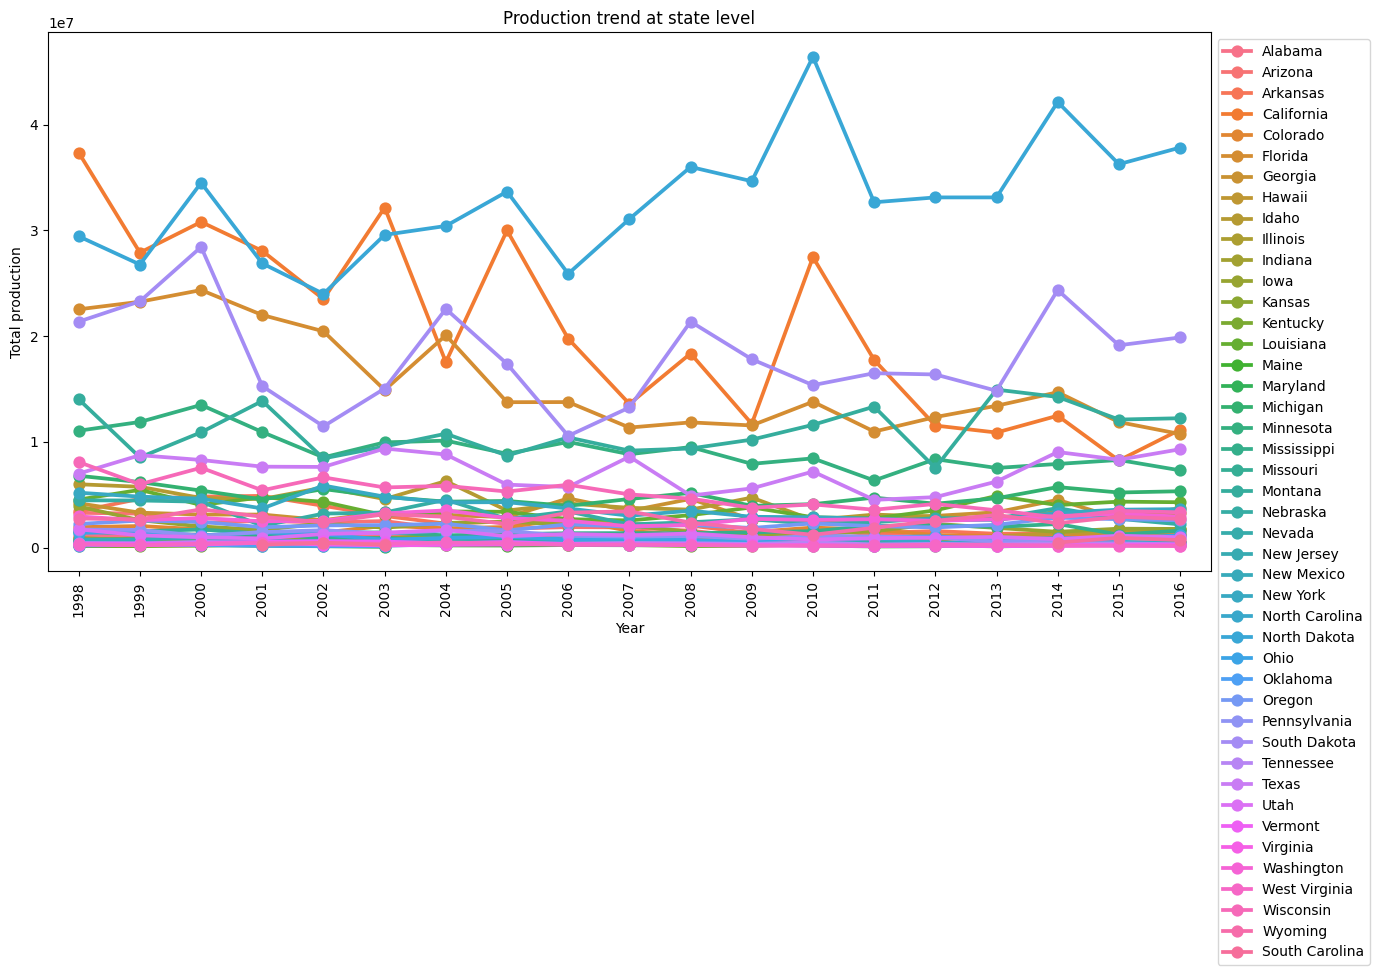

In [135]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, ci=None, hue = 'state')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Total production')
plt.title('Production trend at state level')
plt.show()

- some states have much higher productions than the others but this plot is a little hard to read
- Let's try plotting each state separately for a better understanding

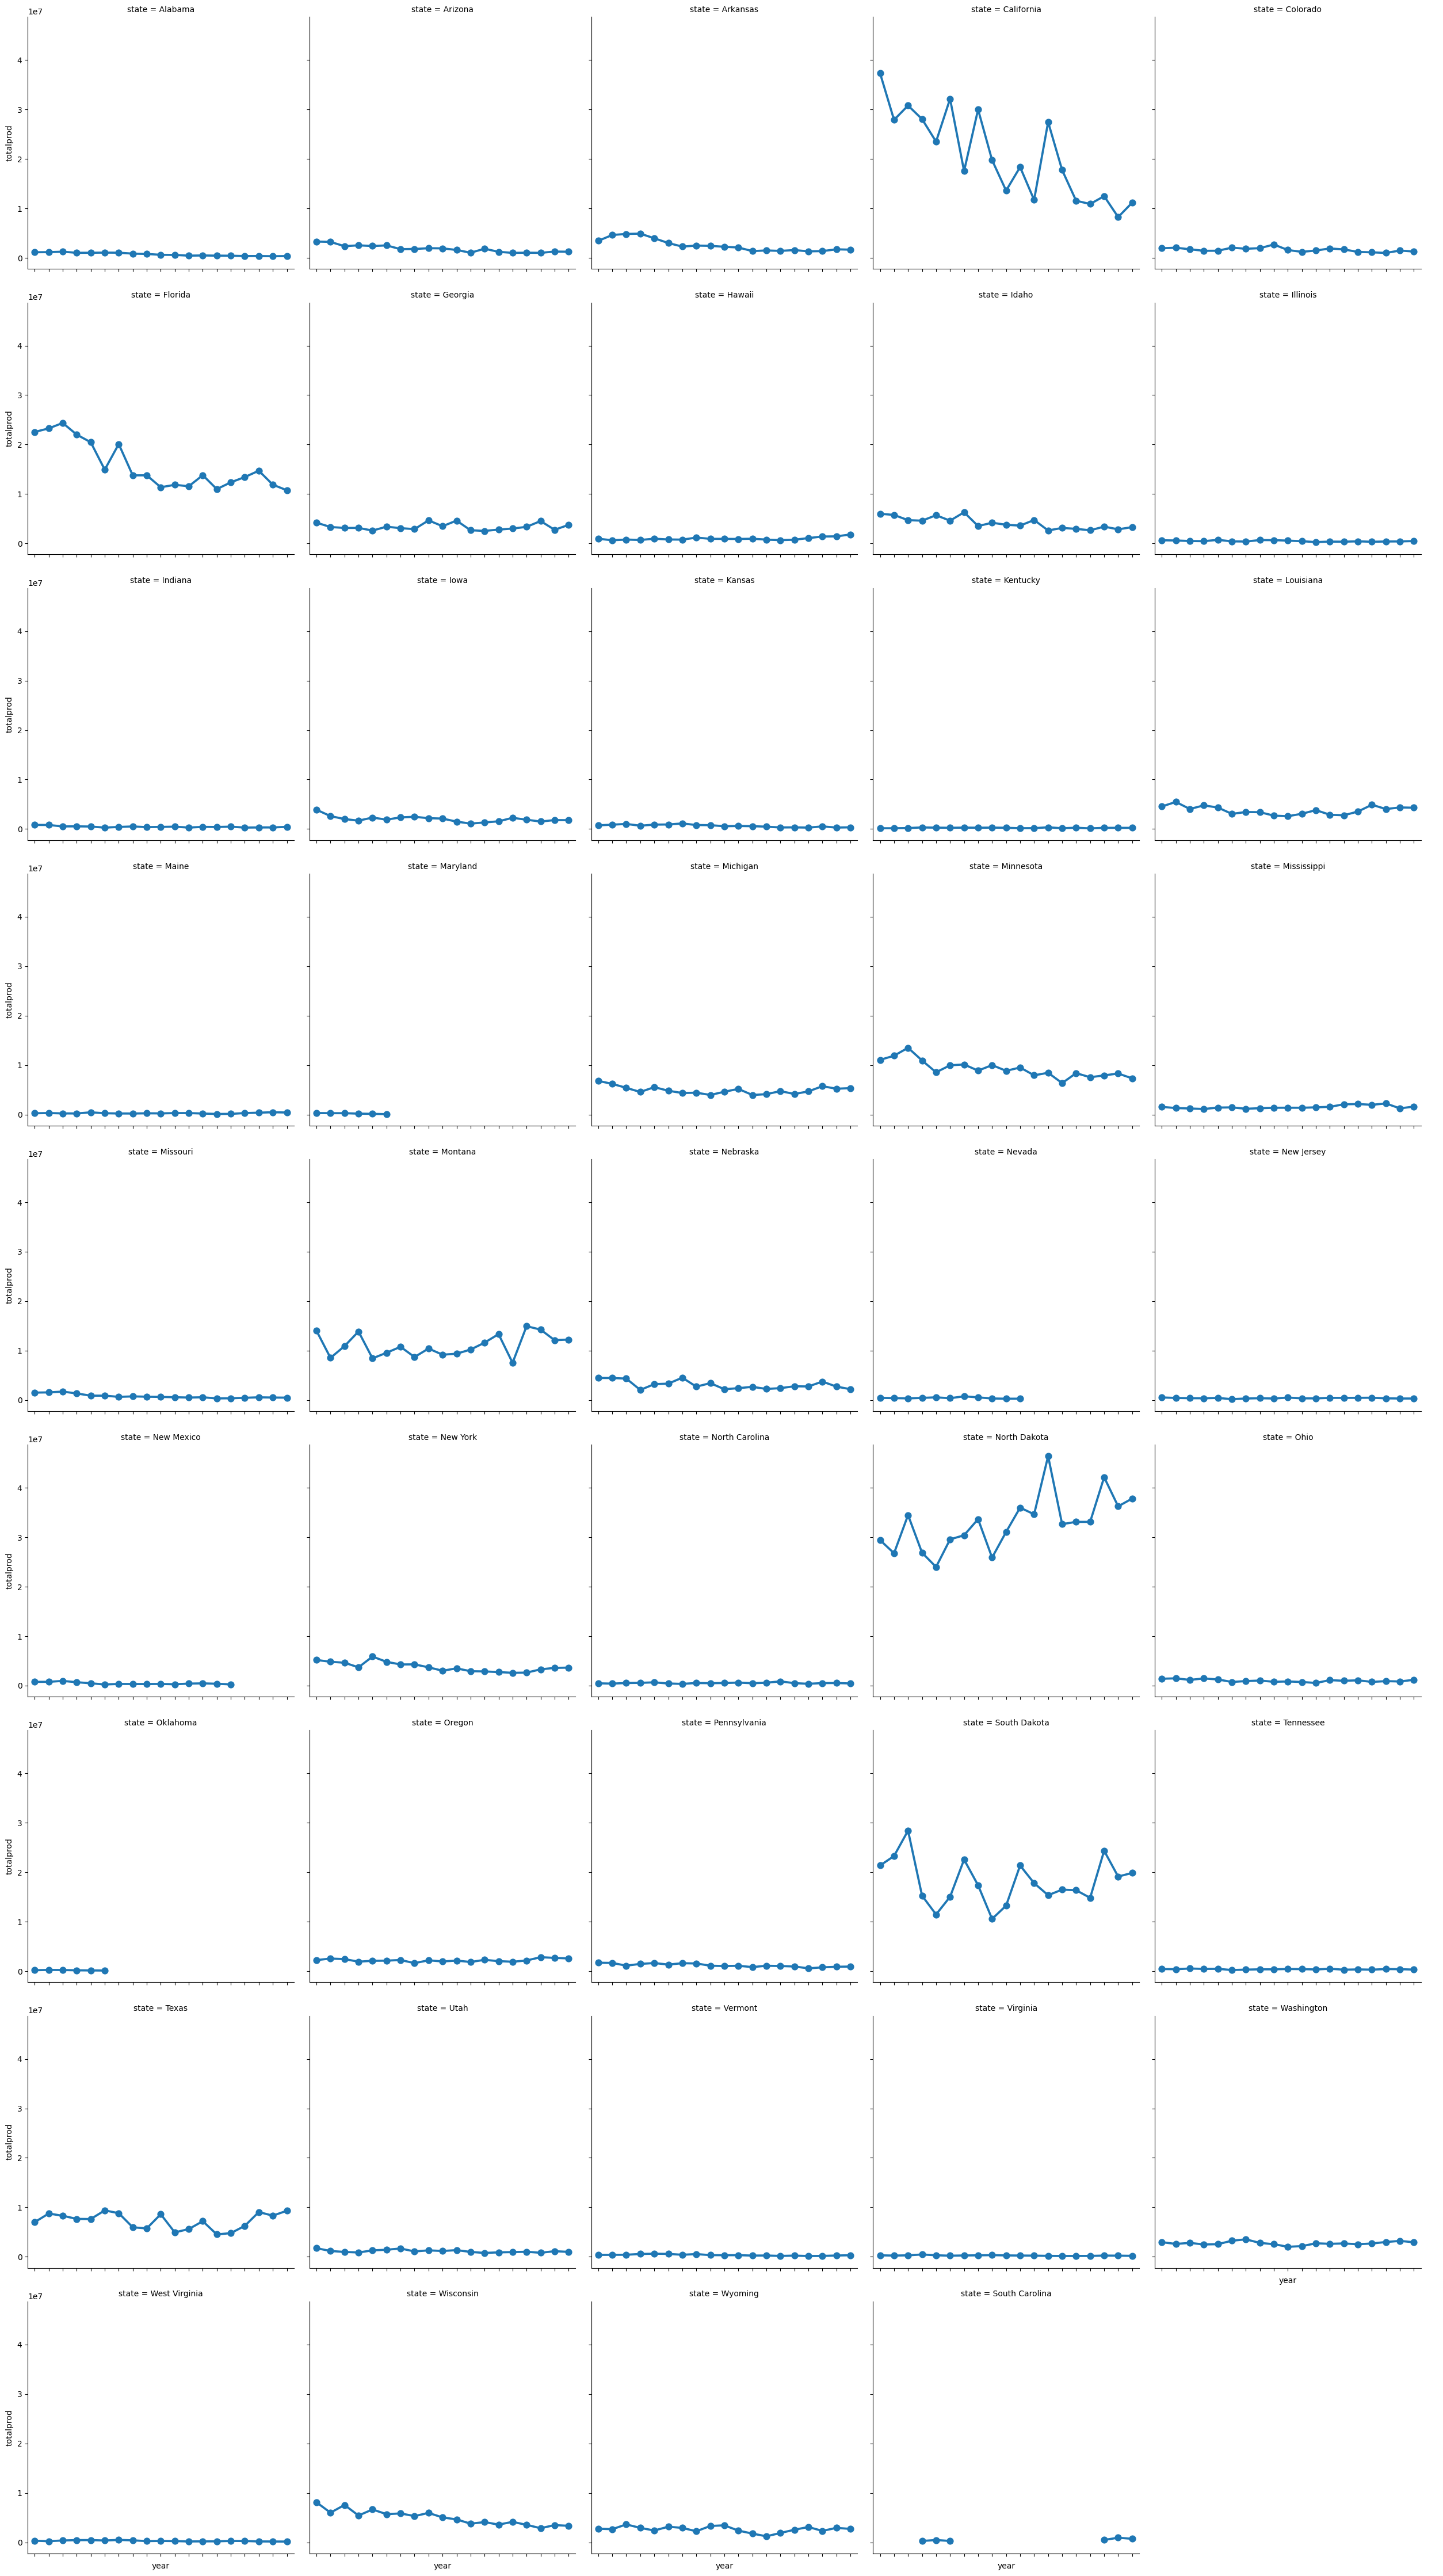

In [136]:
g = sns.catplot(x='year', y='totalprod', data=df,
                estimator=sum, col='state', kind="point",
              col_wrap = 5)
g.set_xticklabels(rotation=90)
plt.show()

- The most prominent honey producing states of US are - California, Florida, North Dakota and South Dakota and Montana
- Unfortunately, the honey production in California has seen a steep decline over the years
- Florida's total production also has been on a decline
- South Dakota has more of less maintained its levels of production
- North Dakota has actually seen an impressive increase in the honey production

#### Yearly trend in number of colonies and yield per colony in the 5 prominent states

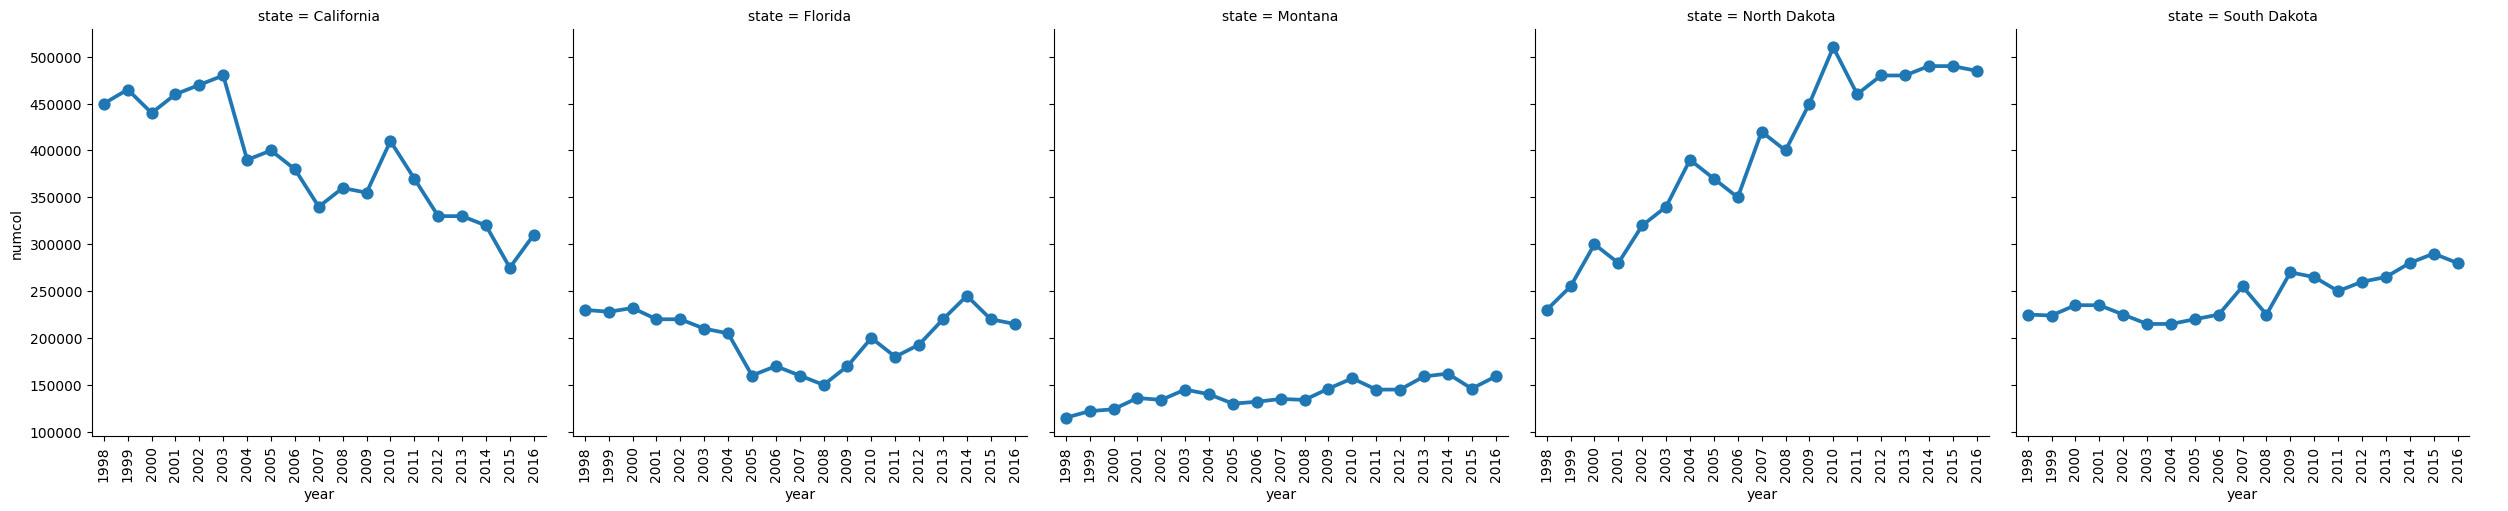

In [137]:
cplot1=sns.catplot(x='year', y='numcol',
            data=df[df["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                col_wrap = 5)
cplot1.set_xticklabels(rotation=90)
plt.show()

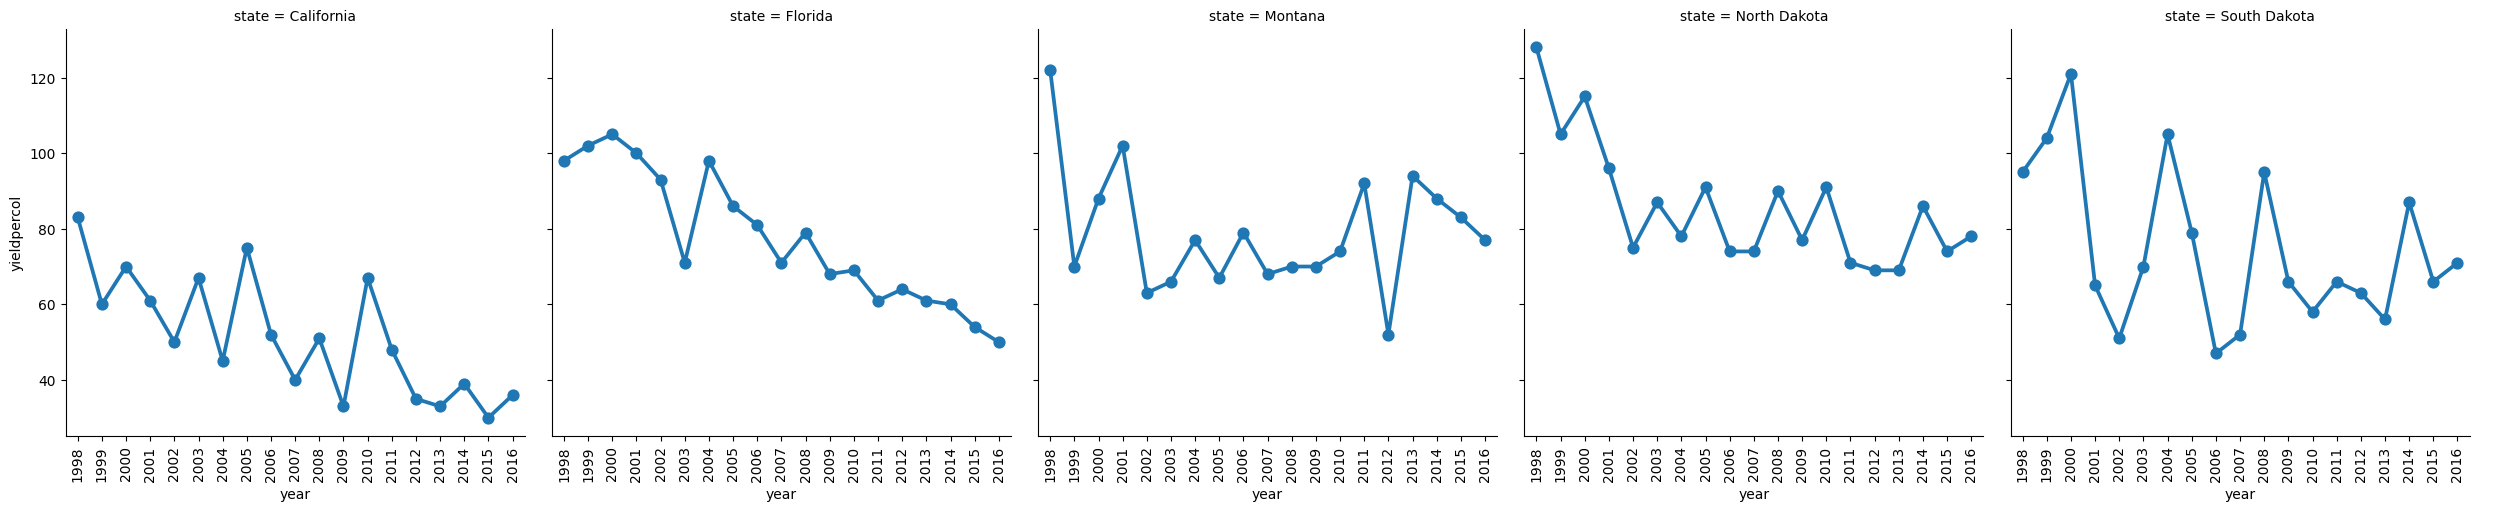

In [138]:
cplot2=sns.catplot(x='year', y='yieldpercol',
            data=df[df["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                col_wrap = 5)
cplot2.set_xticklabels(rotation=90)
plt.show()

- In North Dakota, the number of colonies has increased significantly over the years as compared to the other 4 states
- If we check the yield per colony, it has been in an overall decreasing trend for all the 5 states over the years

#### Effect of the declining production trend on the value of production

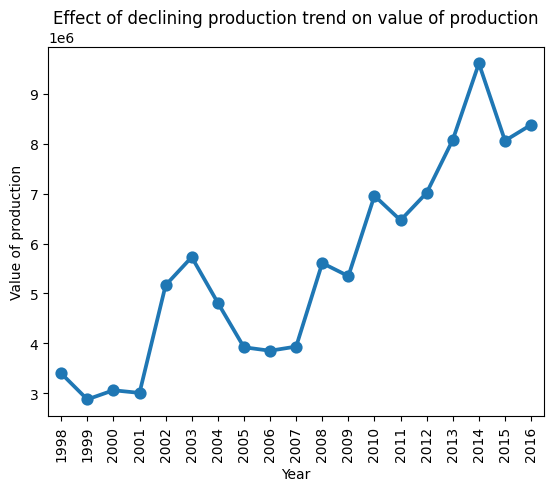

In [139]:
sns.pointplot(x="year", y="prodvalue", data=df, ci=None)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Value of production")
plt.title("Effect of declining production trend on value of production")
plt.show()

- This is an interesting trend. As the total production has declined over the years, the value of production per pound has increased over time
- As the supply declined, the demand has added to the value of honey

#### Total production with the stocks held by the producers

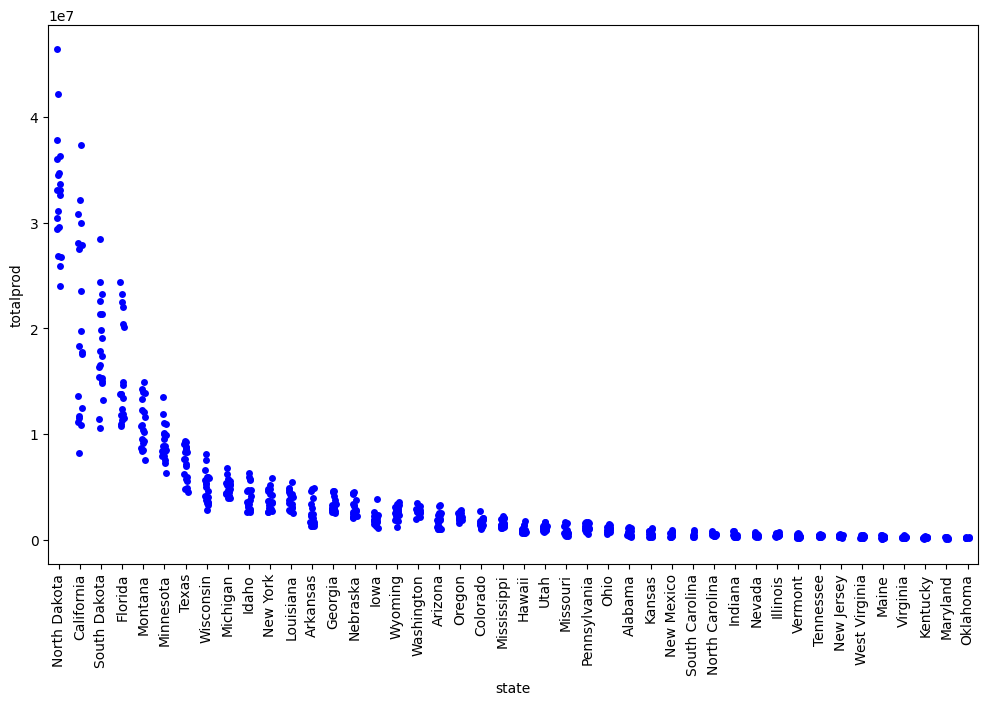

In [140]:
plt.figure(figsize = (12,7))
sns.stripplot(x="state", y="totalprod", data=df.sort_values("totalprod", ascending=False),
             color="b", jitter=True)
plt.xticks(rotation=90)
plt.show()

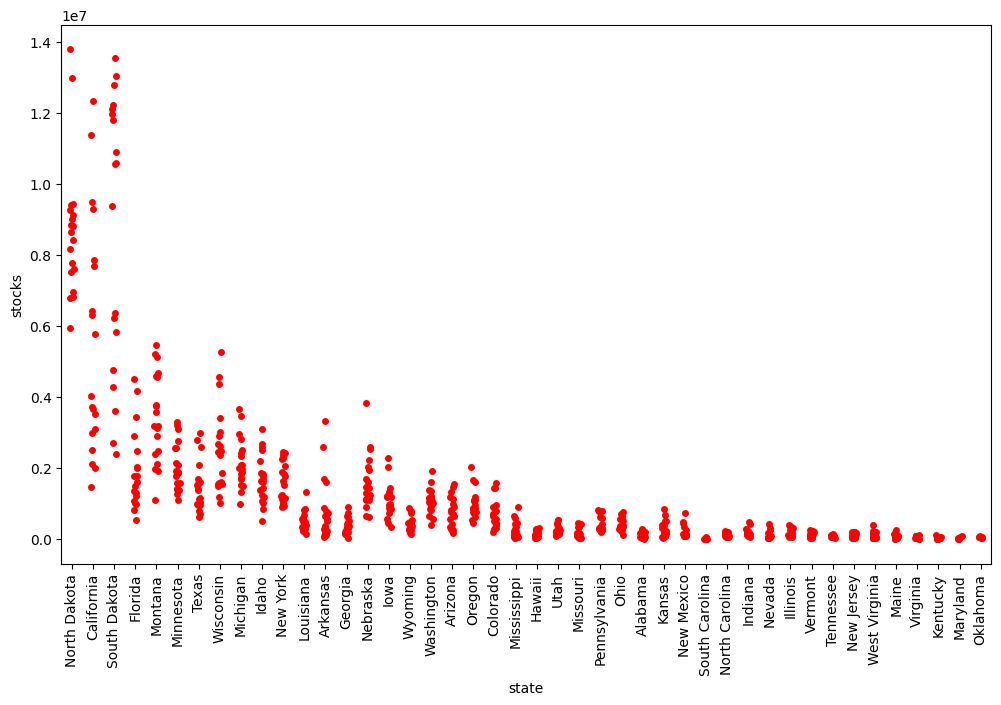

In [141]:
plt.figure(figsize = (12,7))
sns.stripplot(x="state", y="stocks", data=df.sort_values("totalprod", ascending=False),
          color="r", jitter=True)

plt.xticks(rotation=90)
plt.show()

- North Dakota has been able to sell more honey as compared to South Dakota despite having the highest production value
- Florida has the highest efficiency among the major honey-producing states
- Michigan is more efficient than Wisconsin in selling honey

#### Average price per pound of honey across states

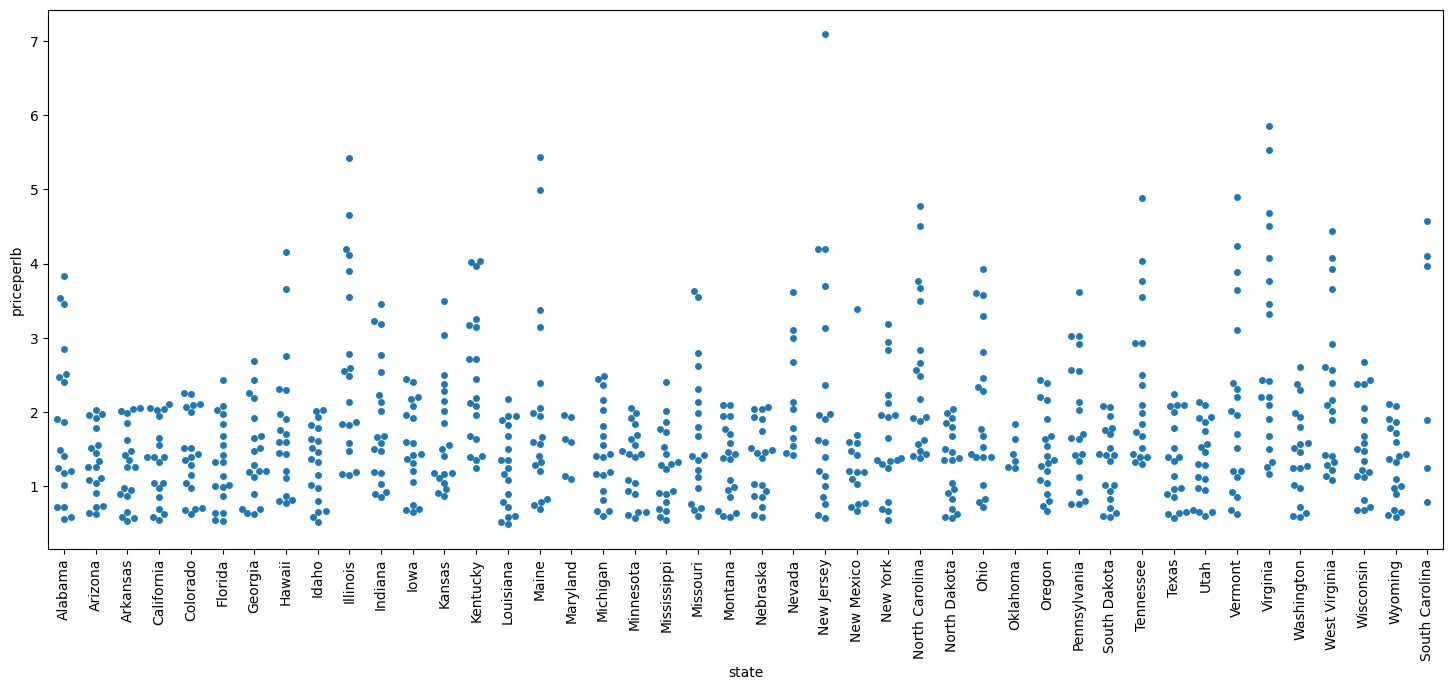

In [142]:
plt.figure(figsize=(18, 7))
sns.swarmplot(data = df, x = "state", y = "priceperlb",
            )
plt.xticks(rotation=90)
plt.show()

- Virginia has the highest price per pound of honey
- The average price per pound of honey in the major honey-producing states is towards the lower end

## Conclusion



- We can conclude that the total honey production has declined over the years whereas the value of production per pound has increased
- The reason for the declined honey production is the decrease in the yield per colony over the years
- The major honey-producing states are California, Florida, North Dakota, South Dakota and Montana
- Among these, Florida has been very efficient in selling honey